# Monte Carlo Integration
Using loop

In [17]:
import numpy as np
from scipy.integrate import simpson
import random as rm

f=lambda x : x*np.exp(x)
a,b=eval(input('Enter lower limit, upper limit of integration : '))
sidex=b-a
x=np.linspace(a,b,1000)
sidey=np.max(f(x))
area_rectangle=sidex*sidey
N=10000000
count=0
for i in range(N):
	x=rm.uniform(a,b)
	y=rm.uniform(0,sidey)
	if y<=f(x):
		count=count+1

A=area_rectangle*(count/N)

def simps(a,b,f):
    x=np.linspace(a,b,1000)
    return simpson(f(x),x=x)  #need to pass x as keyword argument instead of positional argument in simpson()
	
print('The value of integration by Monte-Carlo Simulation is :',format(A,'0.2f'))
print('The result using Simpsons 1/3 rule is :',format(simps(a,b,f),'0.2f'))

Enter lower limit, upper limit of integration :  0,5


The value of integration by Monte-Carlo Simulation is : 593.50
The result using Simpsons 1/3 rule is : 594.65


# Monte Carlo Integration
Faster approach with vectorization

In [36]:
import numpy as np
from scipy.integrate import simpson
import numpy.random as rn

f=lambda x : np.sin(x)
def MonteCarlo(a,b,f):
	N=10000000
	x=np.linspace(a,b,1000)
	y_min=0                             #lies in 1st quadrant
	y_max=np.max(f(x))+1                #any valuec>=f_max
	A=(b-a)*(y_max-y_min)
	x=rn.uniform(a,b,N)
	y=rn.uniform(y_min,y_max,N)
	n=np.sum(abs(y)<abs(f(x)))		#Summing an array returns the sum of the elements in number form. The inequality condition returns array of 'True/False' i.e boolean
	return A*n/N

def simps(a,b,f):
	x=np.linspace(a,b,1000)
	return simpson(f(x),x=x)
	
print('The result using Monte-Carlo Integration is :',MonteCarlo(0,np.pi,f))
print('The result using Simpsons 1/3 rule is :',simps(0,np.pi,f))

The result using Monte-Carlo Integration is : 2.0005938679191653
The result using Simpsons 1/3 rule is : 2.0000000000051616


# Monte Carlo Simulation
Alternate Formulation using mean of discrete variable for large points

In [26]:
import numpy as np
from scipy.integrate import simpson
import numpy.random as rn

f=lambda x : np.sin(x)

def MonteCarlo(a,b,f):
	x=rn.uniform(a,b,1000000)
	return (b-a)*np.mean(f(x))

def simps(a,b,f):
	x=np.linspace(a,b,1000)
	return simpson(f(x),x=x)
	
a,b=eval(input('Enter the range of integration : '))

print('The value of integration by Monte-Carlo Simulation is :',MonteCarlo(a,b,f))
print('The result using Simpsons 1/3 rule is :',simps(a,b,f))

Enter the range of integration :  0,5


The value of integration by Monte-Carlo Simulation is : 0.7194682439462308
The result using Simpsons 1/3 rule is : 0.7163378145319799


# Evaluate value of pi using Monte Carlo Integration 
Using loop

In [35]:
import random as rm
N=10000000
count=0
r=eval(input('Enter the radius of circle : '))
for i in range(N):
	x=rm.uniform(-r,r)
	y=rm.uniform(-r,r)
	if x*x+y*y<=r*r:
		count=count+1

pi=4*(count/N)
print('The value of pi by Monte-Carlo integration is :',format(pi,'0.4f'))

Enter the radius of circle :  4


The value of pi by Monte-Carlo integration is : 3.1413


# Computation of value of pi by Monte-Carlo Integration
Faster approach with vectorization

In [31]:
from numpy.random import uniform as u
N=1000000
r=eval(input('Enter the radius of the circle : '))
inside=sum((u(-r,r,N)**2+u(-r,r,N)**2)<=r*r)
pi=4*inside/N
print('The value of pi from Monte-Carlo Integration is :',format(pi,'0.4f'))

Enter the radius of the circle :  4


The value of pi from Monte-Carlo Integration is : 3.1410


# Computation of value of pi by Monte-Carlo Integration
Alternate Formulation using mean of discrete variable for large points

In [32]:
import numpy as np
import numpy.random as rn

r=eval(input('Enter the radius of circle : '))
def f(x):
	return np.sqrt(r**2-x**2)
def MonteCarlo(a,b,f):
	x=rn.uniform(a,b,1000000)
	return (b-a)*np.mean(f(x))
I=MonteCarlo(0,r,f)
print('The value of pi from Monte-Carlo Integration is :',format(4*I/r**2,'0.4f'))

Enter the radius of circle :  4


The value of pi from Monte-Carlo Integration is : 3.1411


# Problem
Generate N random numbers in the interval -2<x<2 and -2<y<2. Find the number n_frac tht falls in the annular region between the circles x**2+y**2=4 and x**2+y**2=1 by evaluating n_frac/N, estimate the area of the annular region

In [34]:
from numpy.random import uniform as u

N=1000000
rbig=2
rsmall=1

nbig=sum((u(-rbig,rbig,N)**2+u(-rbig,rbig,N)**2)<=rbig*rbig)
nsmall=sum((u(-rbig,rbig,N)**2+u(-rbig,rbig,N)**2)<=rsmall*rsmall)
I_annular=4*rbig**2*(nbig-nsmall)/N

print('The area of annular region from Monte-Carlo Integration is :',I_annular)

The area of annular region from Monte-Carlo Integration is : 9.411168


# Monte Carlo Simulation with plotting

The result using Monte-Carlo Integration is : 2.01
The result using Simpsons 1/3 rule is : 2.00


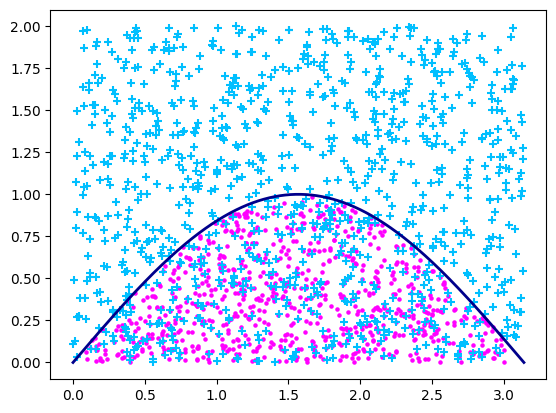

In [42]:
import numpy as np
from scipy.integrate import simpson
import numpy.random as rn
import matplotlib.pyplot as plt

f=lambda x : np.sin(x)

a,b=0,np.pi
N=50000
x=np.linspace(a,b,10000)   
y_min=0
y_max=np.max(f(x))+1
A=(b-a)*(y_max-y_min)
z=rn.uniform(a,b,N)
y=rn.uniform(y_min,y_max,N)
n=np.sum([abs(y)<=abs(f(z))])      

def simps(a,b,f):
	x=np.linspace(a,b,1000)
	return simpson(f(x),x=x)

print('The result using Monte-Carlo Integration is :',format(A*n/N,'0.2f'))
print('The result using Simpsons 1/3 rule is :',format(simps(a,b,f),'0.2f'))

#Plotting
p=[];q=[]
for i in range(N):
	if y[i]<f(z)[i]:
		p.append(y[i])
		q.append(z[i])
	
plt.scatter(q[::20],p[::20],marker='o',color='magenta',s=5)
plt.scatter(z[::50],y[::50],marker='+',color='deepskyblue')
plt.plot(x,f(x),color='darkblue',linewidth=2)
plt.show()